<a href="https://colab.research.google.com/github/ypapay/CUK/blob/main/211205_pythonmachinelearning_midterm_homework_yhw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data 준비

In [1]:
# 기본 항목 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 나눔고딕 폰트 설치
# 폰트 설치 후 런타임 다시 시작 Ctrl+M. 해야 함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumGothic'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
#구글 마운트를 진행하여 csv 파일을 읽을 수 있도록 함
#링크로 연결하여 해제함
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# csv 파일 불러오기
# 파일내 한글이 있어서, encoding = 'cp949' 를 넣어서 불러와야 함

# https://www.data.go.kr/data/15007122/fileData.do 국민건강보험공단_건강검진정보_20201231 자료

df1 = pd.read_csv('https://docs.google.com/uc?export=download&id=119R_0yZUHpZjuYesb26uRA3Su2BgVme4', encoding = 'cp949')
df2 = pd.read_csv('https://docs.google.com/uc?export=download&id=111vp4OEw5UIGtFyBxKH54j-8s98auyIi', encoding = 'cp949')
df3 = pd.read_csv('https://docs.google.com/uc?export=download&id=115w2xL4O8H08oA1D7yh5ntGlMQ3qW2Wm', encoding = 'cp949')
df4 = pd.read_csv('https://docs.google.com/uc?export=download&id=117xN3nIt2rnHWekdmXND2ilkIQxhCRaM', encoding = 'cp949')
df5 = pd.read_csv('https://docs.google.com/uc?export=download&id=117y21TDcaxYPwBaXphhPLv08Pq0ws8Yz', encoding = 'cp949')

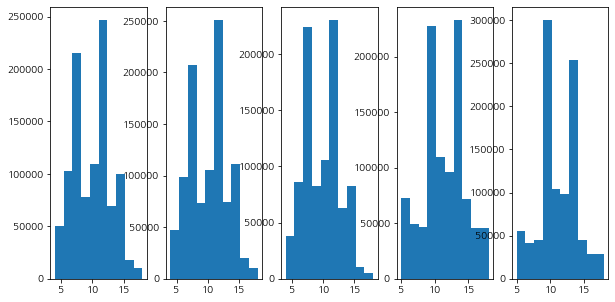

In [5]:
# 데이터 시각화 분석
fig, ax = plt.subplots(1, 5, figsize=(10,5))
ax[0].hist(df1['연령대 코드(5세단위)'])
ax[1].hist(df2['연령대 코드(5세단위)'])
ax[2].hist(df3['연령대 코드(5세단위)'])
ax[3].hist(df4['연령대 코드(5세단위)'])
ax[4].hist(df5['연령대 코드(5세단위)'])
plt.show()

In [6]:
# csv 파일 합치기
df_all =  pd.concat([df1, df2, df3, df4, df5], ignore_index=True)


#필요한 컬럼만 추리기
#0기준년도 1시도코드 2성별코드 3연령 4신장 5체중 6허리 7시력좌 8시력우 9청력좌 10청력우
#11혈압고 12혈압저 13혈당 14총콜레 15트리글리 16HDL 17LDL 18혈색소 19요단백 20혈청
#21AST 22ALT 23감마지티피 24흡연 25음주 26구강검진여부 27충치 28치석 29데이터공개일
# 신장, 체중, 허리둘레로 성별 및 연령을 추정하는 머신러닝을 하려고 함
df_filter = df_all.iloc[:, 2:7]
df_filter.tail()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레
4929051,1.0,6.0,165.0,130.0,133.0
4929052,1.0,12.0,160.0,75.0,86.0
4929053,1.0,5.0,175.0,105.0,103.0
4929054,1.0,12.0,165.0,60.0,78.0
4929055,2.0,12.0,150.0,45.0,66.0


### 전처리

In [7]:
#결측치 확인
df_filter.isnull().sum().sort_values(ascending=True)

성별코드             163
연령대 코드(5세단위)     163
신장(5Cm단위)        822
체중(5Kg 단위)      1246
허리둘레            3560
dtype: int64

In [8]:
# 결측치 처리, 결측치가 포함된 인덱스 모두 삭제
df = df_filter.dropna(axis=0, how='any')
df.describe()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레
count,4.925060e+06,4.925060e+06,4.925060e+06,4.925060e+06,4.925060e+06
mean,1.474496e+00,1.044555e+01,1.625584e+02,6.420697e+01,8.166027e+01
std,4.993492e-01,2.984307e+00,9.373124e+00,1.348280e+01,1.058704e+01
min,1.000000e+00,4.000000e+00,1.000000e+01,1.000000e+01,7.000000e-01
25%,1.000000e+00,8.000000e+00,1.550000e+02,5.500000e+01,7.410000e+01
50%,1.000000e+00,1.100000e+01,1.650000e+02,6.500000e+01,8.200000e+01
75%,2.000000e+00,1.300000e+01,1.700000e+02,7.000000e+01,8.800000e+01
max,2.000000e+00,1.800000e+01,2.050000e+02,2.100000e+02,9.990000e+02


In [9]:
# 아웃라이어 제거
Q1 = df.describe().loc['25%']
Q3 = df.describe().loc['75%']
IQR = Q3 - Q1
lowerB = Q1 - 1.5 * IQR
upperB = Q3 + 1.5 * IQR
df_normal = pd.DataFrame(np.where((df < lowerB), lowerB, np.where((df > upperB), upperB, df)), columns = df.columns)
df_normal.describe()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레
count,4.925060e+06,4.925060e+06,4.925060e+06,4.925060e+06,4.925060e+06
mean,1.474496e+00,1.044555e+01,1.625603e+02,6.393546e+01,8.160536e+01
std,4.993492e-01,2.984307e+00,9.363059e+00,1.269851e+01,1.012978e+01
min,1.000000e+00,4.000000e+00,1.325000e+02,3.250000e+01,5.325000e+01
25%,1.000000e+00,8.000000e+00,1.550000e+02,5.500000e+01,7.410000e+01
50%,1.000000e+00,1.100000e+01,1.650000e+02,6.500000e+01,8.200000e+01
75%,2.000000e+00,1.300000e+01,1.700000e+02,7.000000e+01,8.800000e+01
max,2.000000e+00,1.800000e+01,1.925000e+02,9.250000e+01,1.088500e+02


In [10]:
# 타겟 을 위한 데이터 변경
# 번호 구성은 A0BB 로, A는 성별, B는 나이대로 구분함

# 성별1은 '남', 성별2는 '여'
df_normal['성별코드'] = df_normal['성별코드'].astype(int)
df_normal['성별코드'].replace(1, 1000, inplace=True)
df_normal['성별코드'].replace(2, 2000, inplace=True)

# 연령대에 맞게 수정
df_normal['연령대 코드(5세단위)'] = df_normal['연령대 코드(5세단위)'].astype(int)
df_normal['연령대 코드(5세단위)'] = df_normal['연령대 코드(5세단위)'] *5

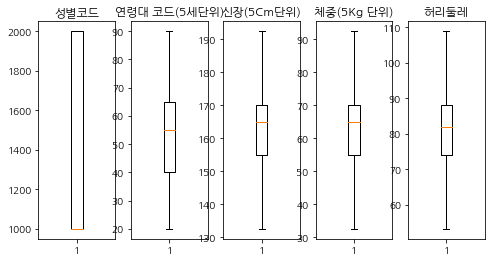

In [11]:
# 제대로 되었는 박스 플롯으로 확인 함
# 따로 분리한 이유는 위에 코딩은 한 번 만 수행해야 하기 때문에 별도 확인 하였음
fig, ax = plt.subplots(1, 5, figsize=(8,4))
for i, col in enumerate(df_normal.columns[:]):
    ax[i].boxplot(df_normal[col])
    ax[i].set_title(col)
plt.show()

In [12]:
# group 열을 추가
df_normal['group'] = df_normal['성별코드'] + df_normal['연령대 코드(5세단위)']

#그룹에 사용된 컬럼은 삭제
df_normal1 = df_normal.iloc[:, 2:]

df_normal1.tail()

,신장(5Cm단위),체중(5Kg 단위),허리둘레,group
4925055,165.0,92.5,108.85,1030
4925056,160.0,75.0,86.00,1060
4925057,175.0,92.5,103.00,1025
4925058,165.0,60.0,78.00,1060
4925059,150.0,45.0,66.00,2060


In [13]:
#데이터가 많으므로 데이터를 간략화 
#30대 40대 남성만 남김

df_normal2 = df_normal1.loc[(df_normal1['group'] == 1030) | (df_normal1['group'] == 1040)] # | (df_normal1['group'] == 2030) | (df_normal1['group'] == 2040)]


# 데이터를 100개만 남김

df_norm = df_normal2.iloc[:100]
df_norm

,신장(5Cm단위),체중(5Kg 단위),허리둘레,group
8,160.0,70.0,80.0,1040
60,160.0,60.0,78.0,1030
141,160.0,60.0,75.0,1040
261,160.0,40.0,68.0,1040
311,160.0,65.0,84.0,1040
...,...,...,...,...
2501,175.0,60.0,75.0,1030
2517,175.0,70.0,89.0,1040
2535,170.0,65.0,78.0,1030
2592,175.0,75.0,82.0,1040


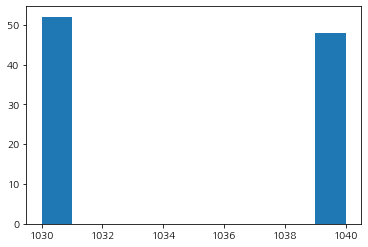

In [14]:
#그룹 별 갯수 확인
plt.hist(df_norm['group'])
plt.show()

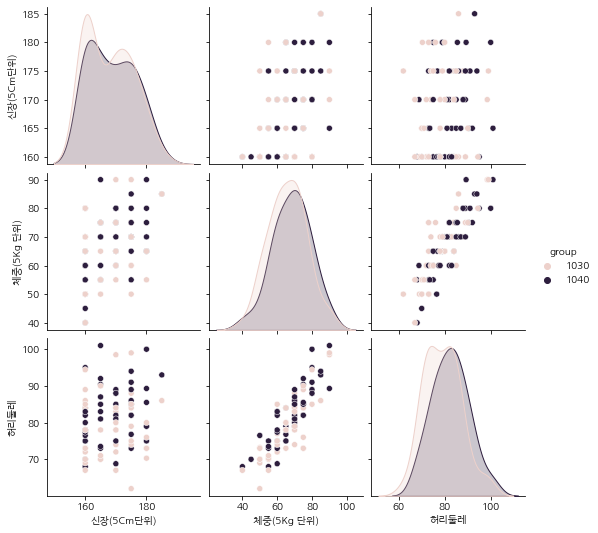

In [15]:
#30대, 40대 남성의 신장, 체중, 허리둘레의 분포를 시각화하여 비교
sns.pairplot(df_norm, hue='group')
plt.show()

### 데이터 Train, Test set split



In [16]:
# X, y data split
groups =  pd.get_dummies(df_norm.group)
X = pd.concat([df_norm.iloc[:, :-1], groups], axis=1)
y = df_norm['group']

In [17]:
X.head()

,신장(5Cm단위),체중(5Kg 단위),허리둘레,1030,1040
8,160.0,70.0,80.0,0,1
60,160.0,60.0,78.0,1,0
141,160.0,60.0,75.0,0,1
261,160.0,40.0,68.0,0,1
311,160.0,65.0,84.0,0,1


In [18]:
y.head()

8      1040
60     1030
141    1040
261    1040
311    1040
Name: group, dtype: int64

In [19]:
# X, y train test 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [20]:
X_train

,신장(5Cm단위),체중(5Kg 단위),허리둘레,1030,1040
141,160.0,60.0,75.0,0,1
2200,175.0,80.0,85.0,1,0
2535,170.0,65.0,78.0,1,0
1853,160.0,65.0,78.0,1,0
1082,180.0,80.0,100.0,0,1
...,...,...,...,...,...
2220,165.0,75.0,85.0,0,1
521,160.0,65.0,73.0,1,0
2190,180.0,55.0,70.3,1,0
759,160.0,80.0,95.0,0,1


### 머신 러닝을 위한 import

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC #SVC
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn import tree #tree
from sklearn.tree import DecisionTreeClassifier #결정트리
from sklearn.ensemble import RandomForestClassifier #RandomForest
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans 
from sklearn.tree import export_graphviz

import graphviz

### kNN분류

In [22]:
#최적의 kNN파라미터 찾기

max_k_range = X_train.shape[0] // 2 # find best k, range from 3 to half of the number of data

k_list = [] # k_list 선언 및 초기화
for i in range(3, max_k_range, 2): # 3 ~ max_k_range 만큼 2씩 더한 값을 i에 대입하며 반복
    k_list += [i]

k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [23]:
cross_validation_scores = [] # cross_validation_scores 선언 및 초기화

for k in k_list:   # 10-fold cross validation
    knn = KNeighborsClassifier(n_neighbors=k) # neighbor를 k개 같는 KNeighborClssifier 선언
    scores = cross_val_score(knn, X_train.iloc[:,:3], y_train.values.ravel(),  # cross validation score 계산 (모델, 입력, 타겟), ravel 다차원배열을 1차원으로
                             cv=10, scoring='accuracy') # 10 fold로 설정, score는 accuracy로 계산
    cross_validation_scores.append(scores.mean()) # 전체 score의 평균값을 cross_validation_scroe에 추가

cross_validation_scores

[0.4375,
 0.4375,
 0.3875,
 0.375,
 0.4125,
 0.4625,
 0.4375,
 0.475,
 0.55,
 0.525,
 0.525,
 0.55,
 0.525,
 0.5625,
 0.5625,
 0.55,
 0.5625,
 0.55,
 0.55]

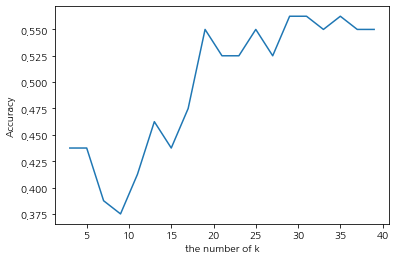

The best number of k : 29


In [24]:
# k의 변화에 따른 정확도 시각화
# k 값이 증가할 수록 정확도가 떨어짐. > 좋은 모델이 아님
plt.plot(k_list, cross_validation_scores) # visualize accuracy according to k
plt.xlabel('the number of k') # x축 제목 설정
plt.ylabel('Accuracy') # y축 제목 설정
plt.show() # 그래프 출력
cvs = cross_validation_scores # cvs에 cross_validation_scores 대입
k = k_list[cvs.index(max(cross_validation_scores))] # cross_validation_score가 가장 높은 값의 index를 찾아 k_list에서 최적의 k값을 반환하여 대입
print("The best number of k : " + str(k) ) # str(k): 정수형 k를 문자열(string)으로 변환

In [25]:
# kNN 모델 테스트
knn = KNeighborsClassifier(n_neighbors=k) # neighbor의 개수를 k개 갖는 KNeighborClassifier 선언

knn.fit(X_train.iloc[:,:3], y_train.values.ravel()) # setup knn using train data

knn_pred = knn.predict(X_test.iloc[:,:3]) # test
print(k)
print("accuracy : "+  # check accuracy
          str(accuracy_score(y_test.values.ravel(), knn_pred)) ) # 실제 타겟 데이터와 예측 값을 통해 정확도(accuracy)를 계산하고 이를 문자열(string)으로 변환

comparison = pd.DataFrame({'prediction':knn_pred, 'ground_truth':y_test.values.ravel()}) # 예측값과 정답(ground truth) 데이터를 pandas dataframe으로 선언
comparison.head(10) # comparison의 상위 10개 데이터를 반환

29
accuracy : 0.45


,prediction,ground_truth
0,1030,1030
1,1030,1040
2,1030,1040
3,1040,1040
4,1030,1040
5,1030,1040
6,1030,1040
7,1030,1030
8,1040,1040
9,1030,1030


### DecisionTree

In [26]:
#파라미터 탐색
dt_acc = pd.DataFrame(columns=['max_depth', 'min_samples_split', 'min_samples_leaf','accuracy'])


for i in range(1,10):
    for j in range(2,10):
        for h in range(2,10):
            clf = tree.DecisionTreeClassifier(max_depth = i,          #max_depth : 트리의 최대 한도 깊이  
                                              min_samples_split=j,  #min_samples_split : 자식 노드를 갖기 위한 최소한의 데이터 갯수  
                                              min_samples_leaf=h   #mins_samples_leaf : 맨 마지막 끝 노드의 최소 데이터 갯수  
                                              ).fit(X_train.iloc[:,:3], y_train)  
            pred = clf.predict(X_test.iloc[:,:3])

            a = pd.DataFrame(data=[[i,j,h,accuracy_score(y_test, pred)]],
                             columns=['max_depth', 'min_samples_split', 'min_samples_leaf','accuracy'])
            dt_acc = dt_acc.append(a)



dt_acc_max = dt_acc.sort_values('accuracy', ascending=False)

dt_acc_max

,max_depth,min_samples_split,min_samples_leaf,accuracy
0,3,4,5,0.75
0,3,8,5,0.75
0,3,2,5,0.75
0,3,3,3,0.75
0,3,3,4,0.75
...,...,...,...,...
0,5,8,2,0.35
0,5,8,6,0.35
0,5,9,2,0.35
0,5,9,6,0.35


max_depth               3
min_samples_split       4
min_samples_leaf        5
accuracy             0.75
Name: 0, dtype: object


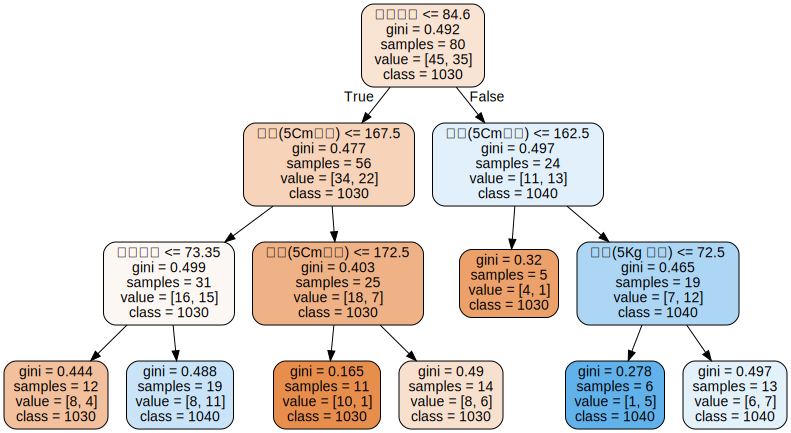

In [27]:
# accuracy최대인 dt_acc_max 기준

f_clf = tree.DecisionTreeClassifier(max_depth = dt_acc_max.iloc[0,0],          #max_depth : 트리의 최대 한도 깊이  
                                  min_samples_split= dt_acc_max.iloc[0,1],  #min_samples_split : 자식 노드를 갖기 위한 최소한의 데이터 갯수  
                                  min_samples_leaf= dt_acc_max.iloc[0,2]   #mins_samples_leaf : 맨 마지막 끝 노드의 최소 데이터 갯수  
                                  ).fit(X_train.iloc[:,:3], y_train) #random_state : 여러번 실행해도, 파라미터가 같을 경우, 결과가 항상 같게 만들어주는 파라미터
f_pred = f_clf.predict(X_test.iloc[:,:3])

print(dt_acc_max.iloc[0,:])


dt_data = tree.export_graphviz(f_clf, out_file=None, # graphviz을 사용하여 clf 트리 시각화
                                feature_names=['신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레'],  # feature name 설정
                                class_names=['1030', '1040'],  # class name 설정
                                filled=True, rounded=True)  # filled: 노드 클래스를 색으로 구분, rounded: 노드 상자의 모서리를 둥글게 설정
dt_graph = graphviz.Source(dt_data) # dot_data로 그래프 생성하여 graph에 대입하여 선언
dt_graph

# gini : 불순도 척도. 0일 경우, 모든 샘플이 하나의 분류값을 갖으며, 0이 아닐 경우, 1에 가까울수록, 여러 분류값이 한 노드에 존재합니다.  
# samples : 노드 안에 들어 있는 데이터의 갯수  
# value : 분류값 별 데이터의 갯수   
# class :  분류값

### SVM

In [28]:
#최적의 SVM 파라미터 찾기
def svc_param_selection(X, y, nfolds):  # 사이킷런에서 제공하는 GridSearchCV를 사용해 최적의 파라미터를 구함
  svm_parameters = [{'kernel': ['rbf'], # svm_parameters 선언
                     'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
                     'C': [0.01, 0.1, 1, 10, 100, 1000]}]
  clf = GridSearchCV(SVC(), svm_parameters, cv=nfolds)  # GridSearch에 들어갈 model(SVC)과 파라미터(svm_parameters), cv_fold(10) 설정하여 선언
  clf.fit(X, y)  #  GridSearch를 통해 입력데이터와 정답 데이터에 맞는 parameter를 찾아 학습
  return clf # 최적의 파라미터로 학습된 모델을 반환

# 최적의 파라미터로 학습된 모델을 clf로 저장
clf = svc_param_selection(X_train, y_train.values.ravel(), 10)

clf_best = clf.best_params_ # 최적의 파라미터를 저장

clf_best

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [29]:
# 시각화할 비용 후보들을 저장
C_canditates = []  # C_candidates 선언 및 초기화
C_canditates.append(clf.best_params_['C'] * 0.01) # C_candidates에 clf best 파라미터 C에 0.01을 곱한 값을 추가
C_canditates.append(clf.best_params_['C'])  # C_candidates에 clf best 파라미터 C를 추가
C_canditates.append(clf.best_params_['C'] * 100) # C_candidates에 clf best 파라미터 C에 100을 곱한 값을 추가
#print(C_canditates)

# 시각화할 감마 후보들을 저장
gamma_candidates = [] # gamma_candidates 선언 및 초기화
gamma_candidates.append(clf.best_params_['gamma'] * 0.01) # gamma_candidates에 clf best 파라미터 gamma에 0.01을 곱한 값을 추가
gamma_candidates.append(clf.best_params_['gamma']) # gamma_candidates에 clf best 파라미터 gamma를 추가
gamma_candidates.append(clf.best_params_['gamma'] * 100) # gamma_candidates에 clf best 파라미터 gamma에 100을 곱한 값을 추가
#print(gamma_candidates)

# 3점슛과 블로킹 횟수로 학습
X = X_train[['신장(5Cm단위)', '체중(5Kg 단위)']] # train에서 3P와 BLK에 해당하는 데이터를 X에 대입
print(X)
# 농구선수 포지션을 학습 모델의 분류값으로 사용
Y = y_train # train에서 Pos데이터에 해당하는 데이터를 list로 변환하여 Y에 대입
print(Y)
# 시각화를 위해 센터(C)와 슈팅가드(SG)를 숫자로 표현

position = []  # position 선언 및 초기화
for gt in Y: # Y 리스트 안에 있는 값을 하나씩 gt에 대입하며 반복
  if gt == 'C': # gt가 C이면 0을 position에 추가
    position.append(0)
  else: # gt가 C가 아니면 1을 position에 추가
    position.append(1) 

classifiers = [] # classifiers 선언 및 초기화

# 파라미터 후보들을 조합해서 학습된 모델들을 저장
for C in C_canditates: # C_candidates 값을 하나씩 C에 대입하면서 반복
  for gamma in gamma_candidates: # gamma_candidates 값을 하나씩 gamma에 대입하면서 반복
      clf = SVC(C=C, gamma=gamma) # C와 gamma를 파라미터로 지정한 SVC 선언
      clf.fit(X, Y) # 입력 데이터(X), 정답 데이터(Y) 데이터로 학습
      classifiers.append((C, gamma, clf)) # 파라미터 C, gamma, 학습된 모델을 classifiers에 추가
print(classifiers)


      신장(5Cm단위)  체중(5Kg 단위)
141       160.0        60.0
2200      175.0        80.0
2535      170.0        65.0
1853      160.0        65.0
1082      180.0        80.0
...         ...         ...
2220      165.0        75.0
521       160.0        65.0
2190      180.0        55.0
759       160.0        80.0
1360      165.0        65.0

[80 rows x 2 columns]
141     1040
2200    1030
2535    1030
1853    1030
1082    1040
        ... 
2220    1040
521     1030
2190    1030
759     1040
1360    1030
Name: group, Length: 80, dtype: int64
[(10.0, 1.0000000000000002e-06, SVC(C=10.0, gamma=1.0000000000000002e-06)), (10.0, 0.0001, SVC(C=10.0, gamma=0.0001)), (10.0, 0.01, SVC(C=10.0, gamma=0.01)), (1000, 1.0000000000000002e-06, SVC(C=1000, gamma=1.0000000000000002e-06)), (1000, 0.0001, SVC(C=1000, gamma=0.0001)), (1000, 0.01, SVC(C=1000, gamma=0.01)), (100000, 1.0000000000000002e-06, SVC(C=100000, gamma=1.0000000000000002e-06)), (100000, 0.0001, SVC(C=100000, gamma=0.0001)), (100000, 0.01, SVC(

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packa

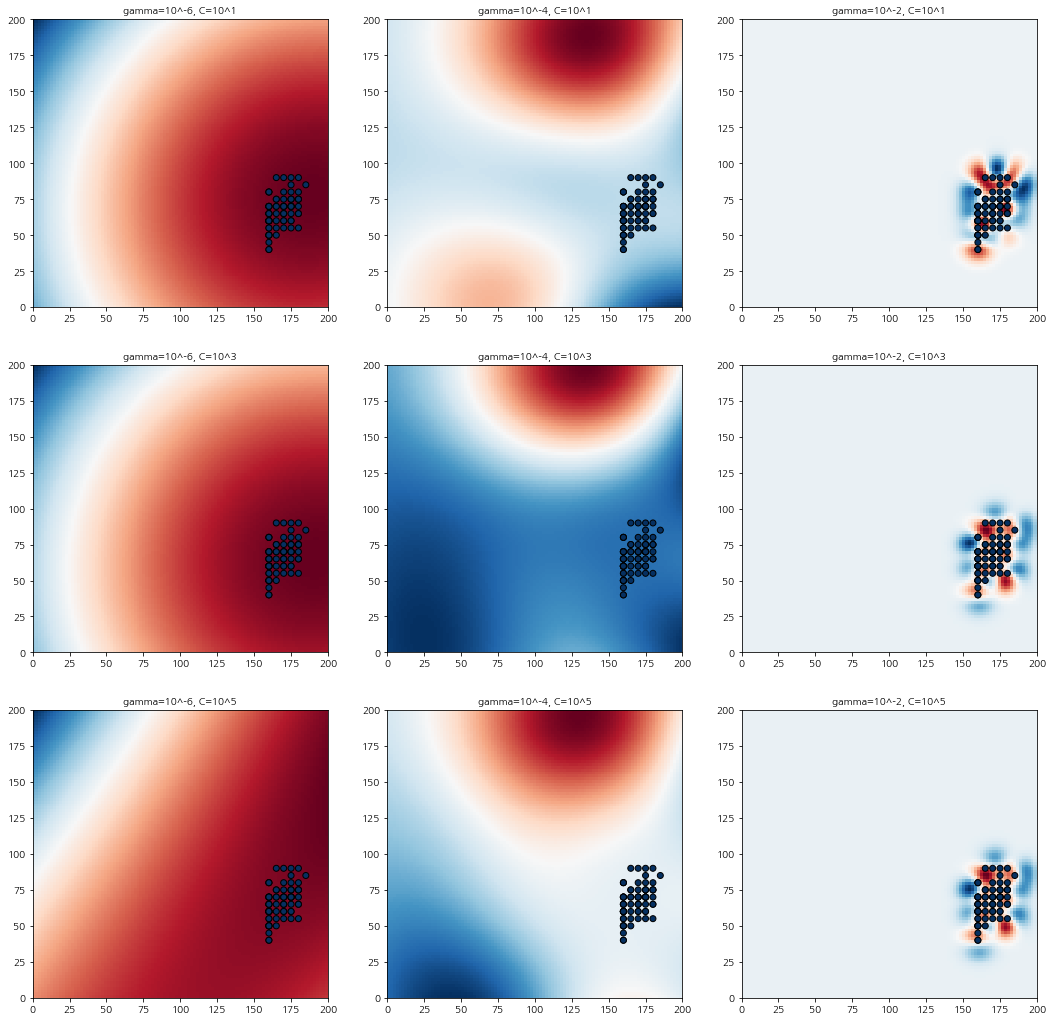

In [30]:
# 각 모델을 시각화
plt.figure(figsize=(18, 18)) # 18, 18 크기의 figure 생성
xx, yy = np.meshgrid(np.linspace(0, 200, 100), np.linspace(0, 200, 100)) # 0~200 사이의 100개의 수열을 x축 기준, y축 기준으로 생성
# 0~4 사이의 100개의 수열을 x축 기준, y축 기준으로 생성
#100을 일단 유지(너무 오래거려서)

for (k, (C, gamma, clf)) in enumerate(classifiers):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # decision function 생성 [xx+yy]
  Z = Z.reshape(xx.shape) # decision function reshape [xx,yy]

  plt.subplot(len(C_canditates), len(gamma_candidates), k + 1) # [C_candidates, gamma_candidates] 크기의 k+1 번째 subplot 생성
  plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size='medium') # 그래프 제목 설정, size는 medium

  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu) # [xx,yy,-Z]의 pcolormesh 생성, cmap(colormap)은 red, blue로 설정
  plt.scatter(X['신장(5Cm단위)'], X['체중(5Kg 단위)'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k') # scatter 그래프 생성 (X['3P'], X['BLK']), c(color)는 position(0,1)로 설정, cmap(colormap)은 red, blue로 설정, edgecolor는 k(검정)

In [31]:
#clf_best['C']
clf_best

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [32]:
#최적의 파라미터로 SVM 평가{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
svm =SVC(C = clf_best['C'], gamma = clf_best['gamma'], kernel= clf_best['kernel']).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [33]:
svm_pred = accuracy_score(y_test, svm_predicted)
svm_pred

1.0

In [34]:
# 정확히 예측한 것을 확인 하였고 추가로 실제 예측값을 확인함

comparison = pd.DataFrame({'prediction': svm_predicted, 
                           'ground_truth': y_test.values.ravel()}) # 예측값과 정답을 padnas dataframe으로 만들어 출력
comparison.head()

,prediction,ground_truth
0,1030,1030
1,1040,1040
2,1040,1040
3,1040,1040
4,1040,1040


### 앙상블

### 배깅

In [35]:
#SVM은 100%로 잘 되었으나 결정트리, KNN 값이 낮아서 추가로 개선 시도 
#하드보팅
voting_model = VotingClassifier(estimators=[ # voting classifier 선언, estimator로는 decision tree, knn을 사용, 가중치 설정, voting: hard, soft 설정
    ('Decision_Tree', f_clf), ('k-NN', knn)],  
    weights=[2, 1], voting='hard') # 결정 트리가 정확도가 높으므로 2로 설정
voting_model.fit(X_train.iloc[:,:3], y_train) # X_train, y_train 데이터로 voting_model 학습
hard_voting_predicted = voting_model.predict(X_test.iloc[:,:3]) # voting_model을 통해 X_test 결과 예측
#accuracy_score(y_test, hard_voting_predicted) # y_test, hard_voting_predicted로 정확도를 계산하여 반환

#소프트보팅
voting_model = VotingClassifier(estimators=[ # # voting classifier 선언, estimator로는 decision tree, knn, svm을 사용, 가중치는 1,1,1로 동일하게 설정, voting: hard, soft 설정
    ('Decision_Tree', f_clf), ('k-NN', knn)], 
    weights=[2,1], voting='soft') # 결정 트리가 정확도가 높으므로 2로 설정
voting_model.fit(X_train.iloc[:,:3], y_train) # X_train, y_train 데이터로 voting_model 학습
soft_voting_predicted = voting_model.predict(X_test.iloc[:,:3]) # voting_model을 통해 X_test 결과 예측

print("d-tree: ", accuracy_score(y_test, f_pred)) # y_test와 dtree_predicted를 사용하여 정확도를 측정하고 결과 출력
print("knn   : ", accuracy_score(y_test, knn_pred)) # y_test와 knn_predicted를 사용하여 정확도를 측정하고 결과 출력
print("hard_voting   : ", accuracy_score(y_test, hard_voting_predicted)) # y_test와 svm_predicted를 사용하여 정확도를 측정하고 결과 출력
print("soft_voting   : ", accuracy_score(y_test, soft_voting_predicted)) # y_test, soft_voting_predicted로 정확도를 계산하여 반환

d-tree:  0.75
knn   :  0.45
hard_voting   :  0.75
soft_voting   :  0.7


### 랜덤포레스트

In [36]:
#파라미터 탐색

rnd_acc = pd.DataFrame(data=[], columns=['n_estimators', 'accuracy'])

for g in range(50,600,50):
    rnd_clf = RandomForestClassifier(n_estimators= g         # n_estimators : 모델 트리 갯수  
                                     ).fit(X_train.iloc[:,:3], y_train)  
    rnd_pred = rnd_clf.predict(X_test.iloc[:,:3])

    rnd_a = pd.DataFrame(data=[[g,accuracy_score(y_test, pred)]],
                         columns=['n_estimators', 'accuracy'])
    rnd_acc = rnd_acc.append(rnd_a)

rnd_acc_max = rnd_acc.sort_values('accuracy', ascending=False)

rnd_acc_max

,n_estimators,accuracy
0,50,0.5
0,100,0.5
0,150,0.5
0,200,0.5
0,250,0.5
0,300,0.5
0,350,0.5
0,400,0.5
0,450,0.5
0,500,0.5


n_estimators     50
accuracy        0.5
Name: 0, dtype: object


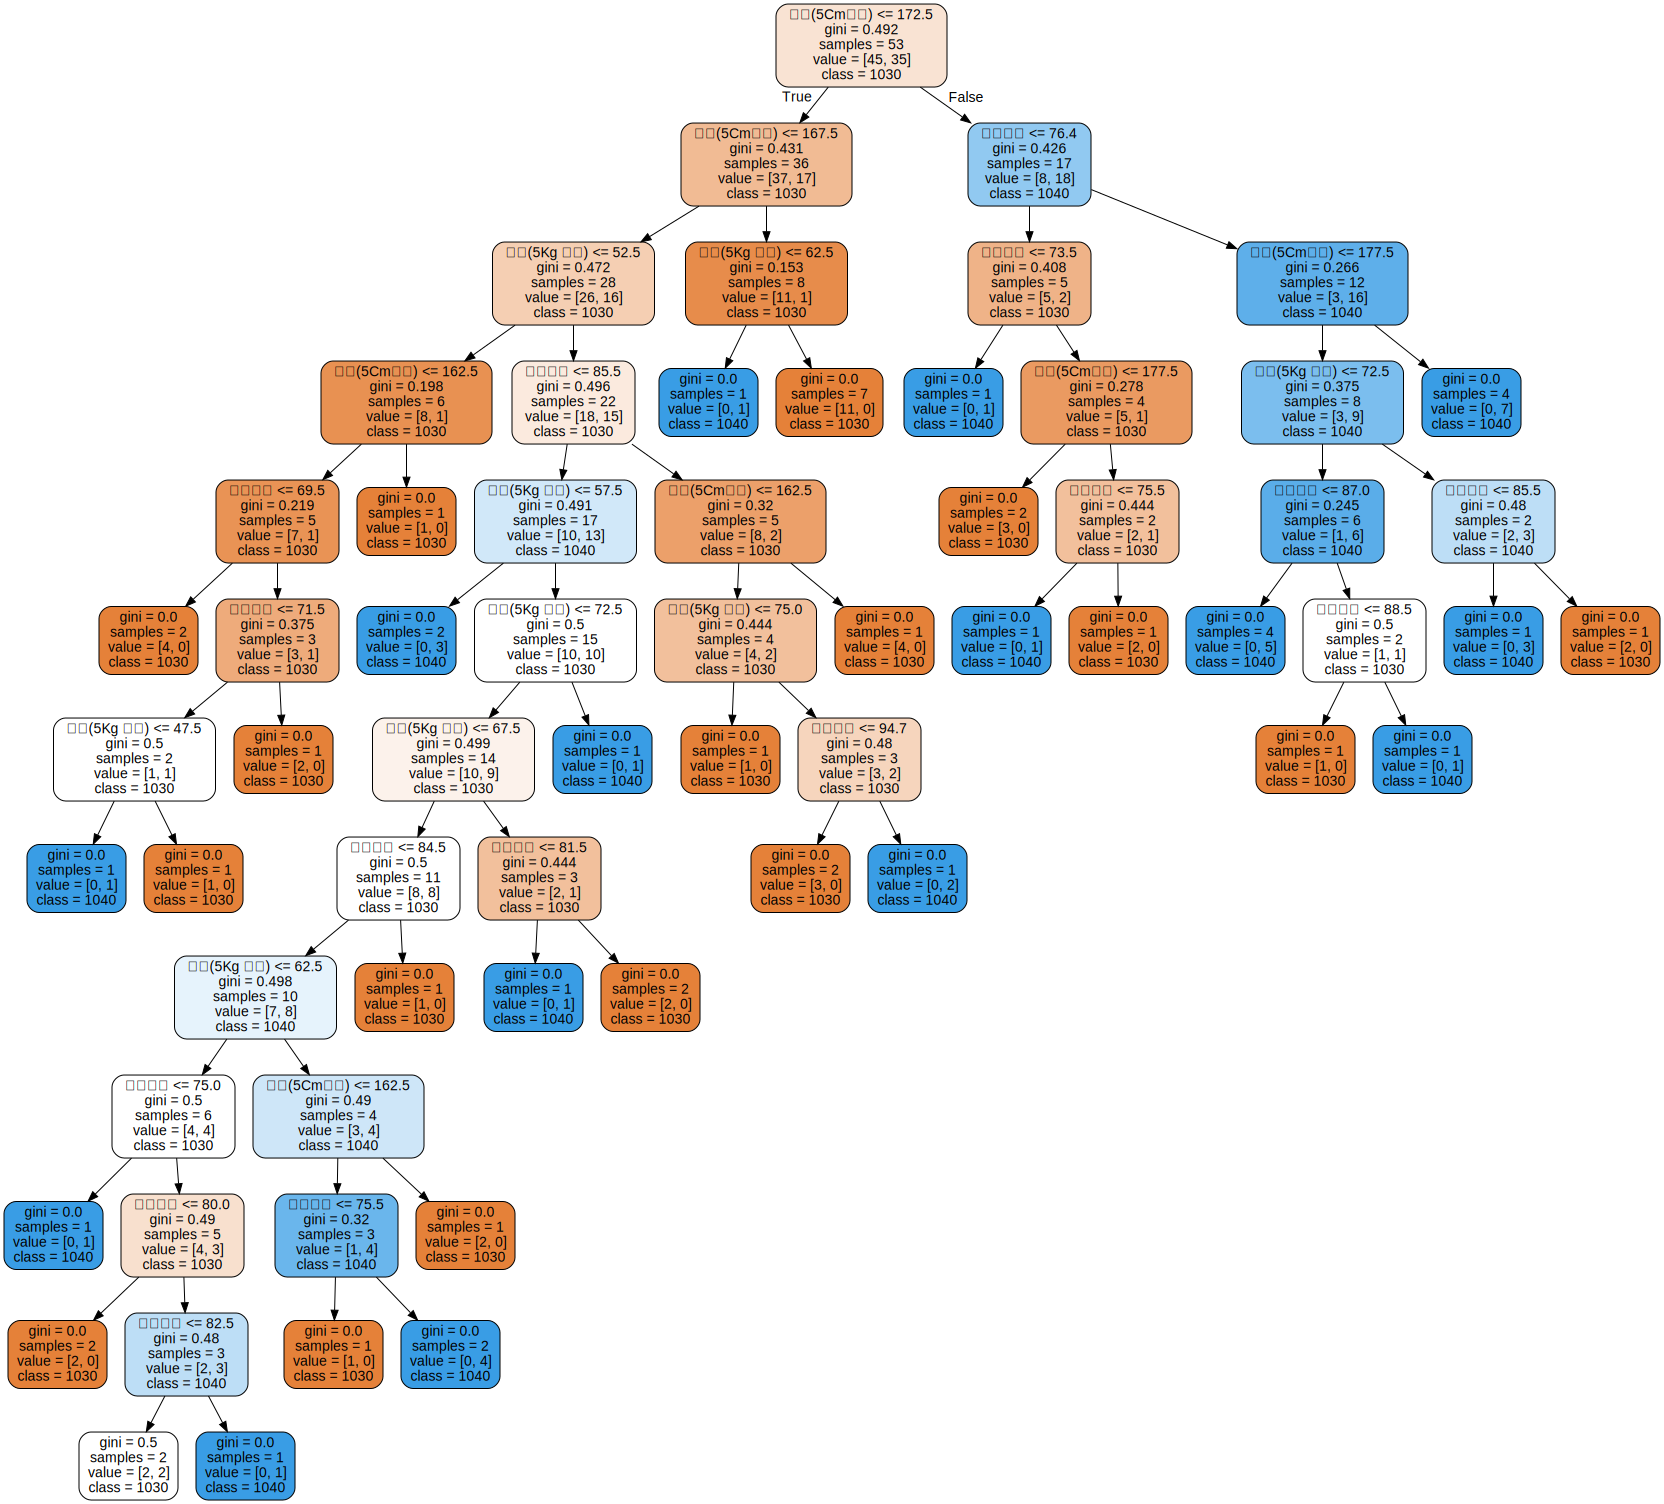

In [37]:
# rnd_acc_max 기준으로 시각화
f_rnd_clf = RandomForestClassifier(n_estimators = rnd_acc_max.iloc[0,0]          # n_estimators : 모델 트리 갯수  
                                        ).fit(X_train.iloc[:,:3], y_train) #random_state : 여러번 실행해도, 파라미터가 같을 경우, 결과가 항상 같게 만들어주는 파라미터
f_rnd_pred = f_rnd_clf.predict(X_test.iloc[:,:3])

print(rnd_acc_max.iloc[0,:])


rnd_data = export_graphviz(f_rnd_clf.estimators_[0], out_file=None, # graphviz을 사용하여 clf 트리 시각화
                                feature_names=['신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레'],  # feature name 설정
                                class_names=['1030', '1040'],  # class name 설정
                                filled=True, rounded=True)  # filled: 노드 클래스를 색으로 구분, rounded: 노드 상자의 모서리를 둥글게 설정
rnd_graph = graphviz.Source(rnd_data) # dot_data로 그래프 생성하여 graph에 대입하여 선언
rnd_graph

# gini : 불순도 척도. 0일 경우, 모든 샘플이 하나의 분류값을 갖으며, 0이 아닐 경우, 1에 가까울수록, 여러 분류값이 한 노드에 존재합니다.  
# samples : 노드 안에 들어 있는 데이터의 갯수  
# value : 분류값 별 데이터의 갯수   
# class :  분류값

### AdaBoost

In [38]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators = 200,
    algorithm = 'SAMME.R', learning_rate = 0.5)
ada_clf.fit(X_train.iloc[:,:3], y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [39]:
#파라미터 탐색

ada_acc = pd.DataFrame(data=[], columns=['n_estimators', 'accuracy'])

for f in range(50,600,50):
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                                 n_estimators= f,         # n_estimators : 모델 트리 갯수  
                                 algorithm = 'SAMME.R', learning_rate = 0.5
                                 ).fit(X_train.iloc[:,:3], y_train)  
    ada_pred = ada_clf.predict(X_test.iloc[:,:3])

    ada_a = pd.DataFrame(data=[[f,accuracy_score(y_test, pred)]],
                         columns=['n_estimators', 'accuracy'])
    ada_acc = ada_acc.append(ada_a)

ada_acc_max = ada_acc.sort_values('accuracy', ascending=False)

ada_acc_max

,n_estimators,accuracy
0,50,0.5
0,100,0.5
0,150,0.5
0,200,0.5
0,250,0.5
0,300,0.5
0,350,0.5
0,400,0.5
0,450,0.5
0,500,0.5


n_estimators     50
accuracy        0.5
Name: 0, dtype: object


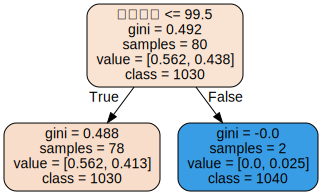

In [40]:
# ada_acc_max 기준으로 시각화
f_ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                               n_estimators = ada_acc_max.iloc[0,0]          # n_estimators : 모델 트리 갯수  
                               ).fit(X_train.iloc[:,:3], y_train) #random_state : 여러번 실행해도, 파라미터가 같을 경우, 결과가 항상 같게 만들어주는 파라미터
f_ada_pred = f_ada_clf.predict(X_test.iloc[:,:3])

print(ada_acc_max.iloc[0,:])


ada_data = export_graphviz(f_ada_clf.estimators_[0], out_file=None, # graphviz을 사용하여 clf 트리 시각화
                                feature_names=['신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레'],  # feature name 설정
                                class_names=['1030', '1040'],  # class name 설정
                                filled=True, rounded=True)  # filled: 노드 클래스를 색으로 구분, rounded: 노드 상자의 모서리를 둥글게 설정
ada_graph = graphviz.Source(ada_data) # dot_data로 그래프 생성하여 graph에 대입하여 선언
ada_graph

# gini : 불순도 척도. 0일 경우, 모든 샘플이 하나의 분류값을 갖으며, 0이 아닐 경우, 1에 가까울수록, 여러 분류값이 한 노드에 존재합니다.  
# samples : 노드 안에 들어 있는 데이터의 갯수  
# value : 분류값 별 데이터의 갯수   
# class :  분류값

### 최종 결과

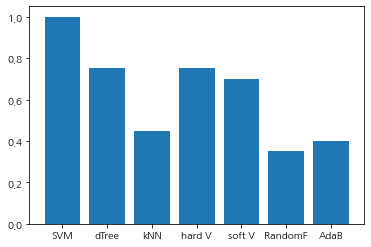

In [41]:
#시각화
x = np.arange(7) # [0, 1, 2, 3, 4, 5, 6] 배열을 x에 대입하여 선언
plt.bar(x, height= [accuracy_score(y_test, svm_predicted), # 'decision tree','knn','svm','hard voting','soft voting' 정확도를 측정하여 바 그래프로 생성
                    accuracy_score(y_test, f_pred),
                    accuracy_score(y_test, knn_pred),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted),
                    accuracy_score(y_test, f_rnd_pred),
                    accuracy_score(y_test, f_ada_pred)])
plt.xticks(x, ['SVM','dTree','kNN','hard V','soft V', 'RandomF', 'AdaB']); # x축 레이블 설정